
The Node2Vec algorithm is a bit complex to implement from scratch without using any libraries. It involves two main steps:

Generate random walks from the graph using a biased random walk procedure.
Use these walks to learn node embeddings, typically using the Word2Vec algorithm.

Node2Vec 알고리즘은 라이브러리를 사용하지 않고 처음부터 구현하기에는 약간 복잡합니다. 여기에는 두 가지 주요 단계가 포함됩니다.


편향된 랜덤 워크 절차를 사용하여 그래프에서 랜덤 워크를 생성합니다.
이러한 워크를 사용하여 일반적으로 Word2Vec 알고리즘을 사용하여 노드 임베딩을 학습합니다.

In [1]:
import random
from math import exp
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy

In [2]:
# Step 1: Generate random walks

# Assume we have a graph represented as an adjacency list
graph = {
    'A': ['C', 'E'],
    'B': ['C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C'],
    'E': ['A','G','F'],
    'F': ['E','H'],
    'G': ['E'],
    'H': ['F'],
}

def random_walk(graph, node, length):
    walk = [node] # 시작 노드
    for _ in range(length - 1): # 반복 수
        neighbors = graph[walk[-1]] # walk의 마지막 요소(현재 방문중인 노드)의 neighbors
        walk.append(random.choice(neighbors)) # neighbors 중에 랜덤
    return walk

# Generate walks for each node
walks = [random_walk(graph, node, 10) for node in graph for _ in range(50)]

# random_walk(graph, "A", 10)
# for node in graph:
#     print(node)

for i in walks:
    print(i)

# print(graph["A"])
# for i in walks:
#     print(i)

['A', 'E', 'F', 'H', 'F', 'H', 'F', 'E', 'F', 'H']
['A', 'E', 'A', 'E', 'A', 'C', 'D', 'B', 'C', 'A']
['A', 'C', 'A', 'C', 'A', 'C', 'B', 'D', 'C', 'A']
['A', 'C', 'D', 'B', 'D', 'B', 'C', 'B', 'D', 'B']
['A', 'C', 'B', 'C', 'B', 'D', 'B', 'D', 'B', 'D']
['A', 'E', 'A', 'E', 'F', 'H', 'F', 'H', 'F', 'H']
['A', 'C', 'D', 'B', 'D', 'C', 'A', 'E', 'G', 'E']
['A', 'C', 'D', 'B', 'D', 'B', 'C', 'B', 'D', 'B']
['A', 'C', 'D', 'B', 'D', 'C', 'D', 'C', 'B', 'C']
['A', 'E', 'A', 'E', 'F', 'E', 'A', 'E', 'G', 'E']
['A', 'C', 'D', 'C', 'B', 'C', 'A', 'C', 'D', 'C']
['A', 'E', 'G', 'E', 'F', 'E', 'F', 'H', 'F', 'H']
['A', 'C', 'D', 'B', 'C', 'B', 'D', 'C', 'D', 'C']
['A', 'C', 'A', 'C', 'D', 'C', 'B', 'C', 'D', 'B']
['A', 'C', 'B', 'C', 'A', 'E', 'A', 'C', 'A', 'E']
['A', 'E', 'G', 'E', 'G', 'E', 'F', 'E', 'F', 'E']
['A', 'E', 'F', 'E', 'F', 'E', 'G', 'E', 'F', 'E']
['A', 'C', 'B', 'D', 'B', 'C', 'B', 'C', 'B', 'C']
['A', 'C', 'D', 'C', 'B', 'D', 'B', 'D', 'B', 'C']
['A', 'E', 'A', 'E', 'A', 'C', 

In [3]:
# Step 2: Learn node embeddings

# We'll use a simple version of the Word2Vec algorithm
# First, we'll initialize our embeddings and context vectors randomly
embeddings = {node: [random.random() for _ in range(10)] for node in graph}
context_vectors = {node: [random.random() for _ in range(10)] for node in graph}

print("embeddings: 각 노드를 10-D로 초기화. \nembeddings and context vectors are two sets of parameters that the algorithm learns.\n The embeddings represent the nodes, context vectors represent the context.")
print("<embeddings>")
for i in embeddings:
    print(i, embeddings[i])
# print("<context_vectors>")
# for i in context_vectors:
#     print(i, context_vectors[i])

def softmax(x):
    e_x = [exp(item) for item in x]
    return [item/sum(e_x) for item in e_x]

embeddings: 각 노드를 10-D로 초기화. 
embeddings and context vectors are two sets of parameters that the algorithm learns.
 The embeddings represent the nodes, context vectors represent the context.
<embeddings>
A [0.7222736911663686, 0.3476755242008076, 0.5134620280633129, 0.7607698229965492, 0.030780088352133084, 0.23815423510764755, 0.9549860152100959, 0.572178156434518, 0.4285943580087609, 0.24860498533262554]
B [0.5898700060461145, 0.7547211794577766, 0.6203496165890392, 0.6765408385708915, 0.6426407077029678, 0.38654952526462216, 0.572576842138996, 0.3032523455292615, 0.8266747581202235, 0.7100965038908899]
C [0.6175381147338164, 0.26025892370154935, 0.8961166810219648, 0.41108599087245457, 0.649860402732048, 0.4804309746413835, 0.16886502662882985, 0.07315358586375065, 0.755424572927669, 0.5099981103711276]
D [0.999393091277276, 0.8674233488881196, 0.07912664851111462, 0.03437224148169682, 0.24831502393483107, 0.8222596798220027, 0.5085241060521658, 0.7518725007864789, 0.994767033626431

In [4]:
for walk in walks:
    for i in range(len(walk)):
        # The 'input' is the embedding for the current node
        print(embeddings[walk[i]])
        # input_vector = embeddings[walk[i]]

[0.7222736911663686, 0.3476755242008076, 0.5134620280633129, 0.7607698229965492, 0.030780088352133084, 0.23815423510764755, 0.9549860152100959, 0.572178156434518, 0.4285943580087609, 0.24860498533262554]
[0.36280918702038556, 0.3083219536895446, 0.7222753512297184, 0.4471070611292183, 0.8747142857325754, 0.4364903930538735, 0.1409891213115504, 0.04254244673639396, 0.22150669672426915, 0.04055542567865189]
[0.18910235292605493, 0.6730634223052218, 0.6513416945392787, 0.03173239202228373, 0.40948072973243044, 0.6381206267870481, 0.7191271984860869, 0.3450128521321377, 0.8099526855694482, 0.9086883083443066]
[0.3353322125547181, 0.08986049044548272, 0.7551314705698822, 0.0720412293070718, 0.8873249974867916, 0.9612213248608706, 0.5402783986917072, 0.5109170996673696, 0.7164189191048274, 0.6243471810308185]
[0.18910235292605493, 0.6730634223052218, 0.6513416945392787, 0.03173239202228373, 0.40948072973243044, 0.6381206267870481, 0.7191271984860869, 0.3450128521321377, 0.8099526855694482, 0

In [28]:
# Then, we'll perform stochastic gradient descent to learn the embeddings
for _ in range(10):
    for walk in walks:
        for i in range(len(walk)):
            # The 'input' is the embedding for the current node
            input_vector = embeddings[walk[i]]

            # The 'output' is a combination of the context vectors for the surrounding nodes
            context = [context_vectors[node] for node in walk[max(0, i - 2):i] + walk[i + 1:min(len(walk), i + 3)]]
            output_vector = [sum(col) / len(col) for col in zip(*context)]

            # We'll use the softmax function to get a probability distribution
            output_probs = softmax(output_vector)

            # Then we'll update the embedding and context vectors using gradient descent
            for j in range(len(input_vector)):
                error = input_vector[j] - output_probs[j]
                learning_rate = 0.01
                embeddings[walk[i]][j] -= learning_rate * error
                for node in walk[max(0, i - 2):i] + walk[i + 1:min(len(walk), i + 3)]:
                    context_vectors[node][j] -= learning_rate * error

OverflowError: math range error

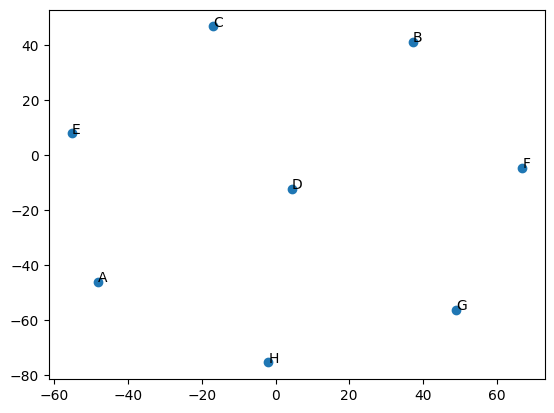

In [29]:
# Prepare the data for t-SNE
labels = list(embeddings.keys())
data = np.array(list(embeddings.values()))  # Convert data to a NumPy array

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=min(30, len(data)-1))
transformed_data = tsne.fit_transform(data)

# Plot the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

# Add labels
for i, label in enumerate(labels):
    plt.annotate(label, (transformed_data[i, 0], transformed_data[i, 1]))

plt.show()


이 코드는 먼저 그래프에서 랜덤 워크를 생성한 다음 단순화된 버전의 Word2Vec 알고리즘을 사용하여 이러한 워크에서 노드 임베딩을 학습합니다. 임베딩은 현재 노드의 임베딩과 주변 노드에 대한 컨텍스트 벡터의 평균 간의 차이를 최소화하기 위해 확률적 경사 하강법을 수행하여 학습됩니다.


이것은 Node2Vec 및 Word2Vec 알고리즘의 매우 단순화된 버전입니다. 실제 알고리즘에는 네거티브 샘플링 및 서브샘플링과 같은 보다 복잡한 기술이 포함되며 워크에서 이전 노드에 가까운 노드로 편향된 랜덤 워크를 생성하는 보다 정교한 방법을 사용합니다. 또한 Word2Vec 알고리즘은 일반적으로 임베딩을 학습하기 위해 신경망과 같은 더 복잡한 모델을 사용합니다. 완전하고 효율적인 구현을 위해 Node2Vec 구현을 제공하는 Gensim 또는 PyTorch Geometric과 같은 라이브러리를 사용하는 것이 좋습니다.

This code first generates random walks from the graph, then uses a simplified version of the Word2Vec algorithm to learn node embeddings from these walks. The embeddings are learned by performing stochastic gradient descent to minimize the difference between the current node's embedding and the average of the context vectors for the surrounding nodes.

Please note that this is a very simplified version of the Node2Vec and Word2Vec algorithms. The actual algorithms involve more complex techniques like negative sampling and subsampling, and they use a more sophisticated method for generating random walks that is biased towards nodes that are close to the previous node in the walk. Also, the Word2Vec algorithm typically uses a more complex model like a neural network to learn the embeddings. For a complete and efficient implementation, I would recommend using a library likeGensim or PyTorch Geometric that provides an implementation of Node2Vec.